**CNN: CIFAR-10 Classification**

About CIFAR-10: it is an image classification dataset consisting of 60,000, 32x32 size images belonging to 10 classes. Each image is a color image, therefore each image has dimensions: 32x32x3

In [ ]:
from model import ConvNN
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Data Preparation
input_shape = (32, 32, 3)
num_classes = 10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Model Instantiation
model = ConvNN(input_shape=input_shape, num_classes=num_classes)

#optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Model Compilation
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Training
batch_size = 64
epochs = 30
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 40ms/step - accuracy: 0.3683 - loss: 1.8981 - val_accuracy: 0.4634 - val_loss: 1.6943
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.5754 - loss: 1.3482 - val_accuracy: 0.6184 - val_loss: 1.2551
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6451 - loss: 1.1691 - val_accuracy: 0.6619 - val_loss: 1.1322
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.6872 - loss: 1.0715 - val_accuracy: 0.6785 - val_loss: 1.1042
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.7137 - loss: 1.0087 - val_accuracy: 0.7218 - val_loss: 0.9848
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.7350 - loss: 0.9633 - val_accuracy: 0.7395 - val_loss: 0.9684
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7473 - loss: 0.9344 - val_accuracy: 0.7428 - val_loss: 0.9448
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7577 - loss: 0.9057 - 

In [27]:

# Evaluation
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.6824686527252197
Test accuracy: 0.8413000106811523


In [28]:
predictions = model.predict(x_test[:20])
print("Predicted:", np.argmax(predictions, axis=1))
print("True:", np.argmax(y_test[:20], axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
Predicted: [3 8 8 0 6 6 1 6 3 1 0 9 7 7 9 8 5 7 8 6]
True: [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 


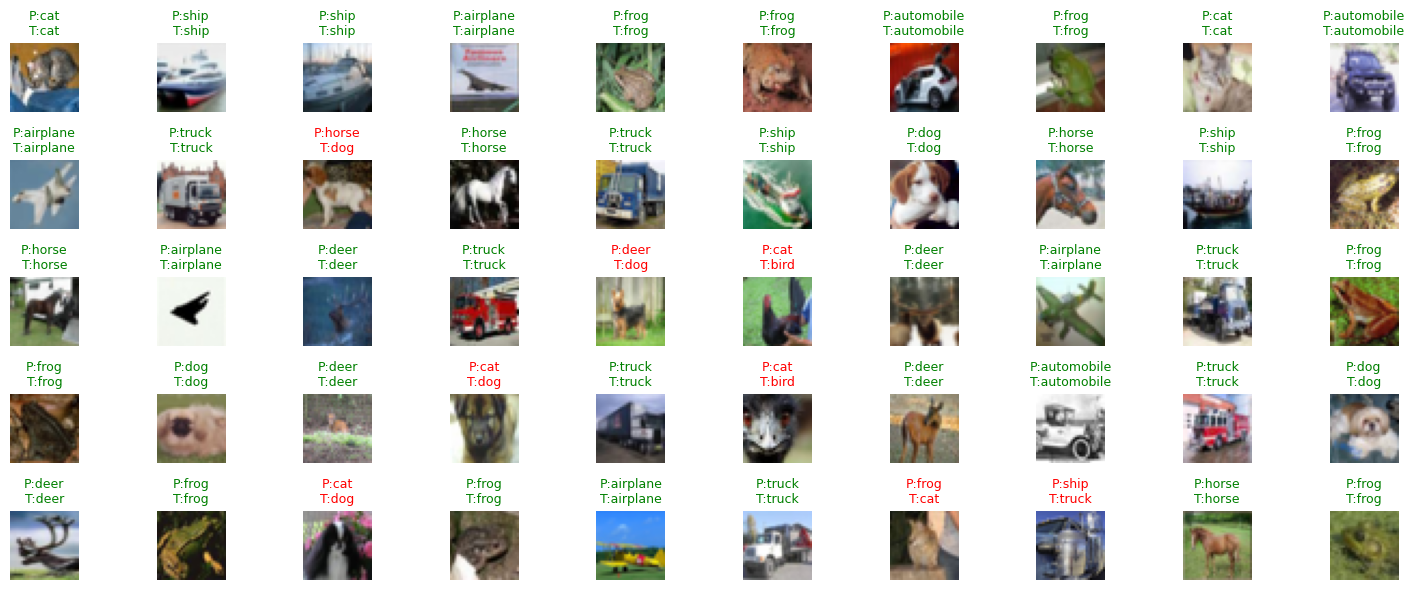

In [29]:
# Get predictions for first 20
predictions = model.predict(x_test[:50])
pred_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:50], axis=1)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 6))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')
    color = "green" if pred_classes[i] == true_classes[i] else "red"
    plt.title(f"P:{class_names[pred_classes[i]]}\nT:{class_names[true_classes[i]]}",
              fontsize=9, color=color)

plt.tight_layout()
plt.show()

In [ ]:
model.save("cifar10_model.keras")